In [ ]:
import platform

print(f"CPU: {platform.processor()}")
print(f"Platform: {platform.platform()}")
print(f"Machine: {platform.machine()}")
print(f"Processor: {platform.processor()}")
print(f"System: {platform.system()}")

CPU: x86_64
Platform: Linux-6.1.123+-x86_64-with-glibc2.35
Machine: x86_64
Processor: x86_64
System: Linux


In [ ]:
import pandas as pd
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm

# Prerequisites

In [ ]:
!pip install torch torchvision pytorchvideo mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.9 MB/s eta 0:00:

In [ ]:
!unzip /content/drive/MyDrive/Dataset/videos.zip -d /content/videos

Streaming output truncated to the last 5000 lines.
  inflating: /content/videos/57382.mp4  
  inflating: /content/videos/57385.mp4  
  inflating: /content/videos/57391.mp4  
  inflating: /content/videos/57392.mp4  
  inflating: /content/videos/57393.mp4  
  inflating: /content/videos/57394.mp4  
  inflating: /content/videos/57395.mp4  
  inflating: /content/videos/57396.mp4  
  inflating: /content/videos/57397.mp4  
  inflating: /content/videos/57408.mp4  
  inflating: /content/videos/57410.mp4  
  inflating: /content/videos/57411.mp4  
  inflating: /content/videos/57412.mp4  
  inflating: /content/videos/57413.mp4  
  inflating: /content/videos/57414.mp4  
  inflating: /content/videos/57415.mp4  
  inflating: /content/videos/57416.mp4  
  inflating: /content/videos/57417.mp4  
  inflating: /content/videos/57430.mp4  
  inflating: /content/videos/57436.mp4  
  inflating: /content/videos/57437.mp4  
  inflating: /content/videos/57438.mp4  
  inflating: /content/videos/57439.mp4  
  infl

# Class names and label map

In [ ]:
class_names = []
class_idx = {}

with open('/content/drive/MyDrive/Dataset/wlasl_class_list.txt', 'r') as f:
    for line in f:
        idx, word = line.strip().split('\t')
        idx = int(idx)
        class_names.append(word)
        class_idx[word] = idx

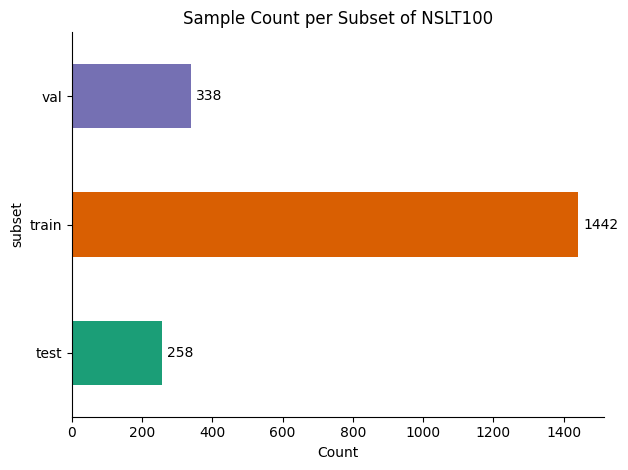

In [ ]:
def show_split_nlst100(json_path='/content/drive/MyDrive/Dataset/nslt_100.json', dataset_name='NSLT100'):
    with open(json_path, 'r') as f:
        data = json.load(f)

    records = []
    for sample_id, info in data.items():
        subset = info.get('subset', 'unknown')
        records.append({'sample_id': sample_id, 'subset': subset})

    df = pd.DataFrame(records)

    counts = df.groupby('subset').size()

    ax = counts.plot(kind='barh', color=sns.color_palette('Dark2'))

    plt.gca().spines[['top', 'right']].set_visible(False)

    for i, v in enumerate(counts):
        plt.text(v + max(counts) * 0.01, i, str(v), va='center')

    plt.xlabel("Count")
    plt.title(f"Sample Count per Subset of {dataset_name}")
    plt.tight_layout()
    plt.savefig("split.png", dpi=300)
    plt.show()

show_split_nlst100()

In [ ]:
!unzip /content/drive/MyDrive/Dataset/landmarks-64.zip -d /content/landmarks-64

Archive:  /content/drive/MyDrive/Dataset/landmarks-64.zip
  inflating: /content/landmarks-64/00618.npy  
  inflating: /content/landmarks-64/00623.npy  
  inflating: /content/landmarks-64/00624.npy  
  inflating: /content/landmarks-64/00625.npy  
  inflating: /content/landmarks-64/00626.npy  
  inflating: /content/landmarks-64/00627.npy  
  inflating: /content/landmarks-64/00628.npy  
  inflating: /content/landmarks-64/00629.npy  
  inflating: /content/landmarks-64/00630.npy  
  inflating: /content/landmarks-64/00631.npy  
  inflating: /content/landmarks-64/00632.npy  
  inflating: /content/landmarks-64/00633.npy  
  inflating: /content/landmarks-64/00634.npy  
  inflating: /content/landmarks-64/00635.npy  
  inflating: /content/landmarks-64/00636.npy  
  inflating: /content/landmarks-64/00638.npy  
  inflating: /content/landmarks-64/00639.npy  
  inflating: /content/landmarks-64/01382.npy  
  inflating: /content/landmarks-64/01383.npy  
  inflating: /content/landmarks-64/01384.npy  
  

In [ ]:
import torch
from torch.utils.data import Dataset

class WLDataset(Dataset):
    def __init__(self, data_path, video_dir, landmark_dir, subset='train', num_frames=64, img_size=224):
        self.num_frames = num_frames
        self.img_size = img_size
        self.video_dir = video_dir
        self.landmark_dir = landmark_dir

        with open(data_path, 'r') as f:
            metadata = json.load(f)

        self.samples = []
        for vid_id, info in metadata.items():
            if info["subset"] == subset:
                label = info["action"][0]
                video_path = os.path.join(video_dir, f"{vid_id}.mp4")
                landmark_path = os.path.join(landmark_dir, f"{vid_id}.npy")
                if os.path.exists(video_path) and os.path.exists(landmark_path):
                    self.samples.append((video_path, landmark_path, label))

    def __len__(self):
        return len(self.samples)

    def _load_video(self, path):
        cap = cv2.VideoCapture(path)
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (self.img_size, self.img_size))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
        cap.release()

        indices = np.linspace(0, len(frames)-1, num=self.num_frames).astype(int)
        frames = [frames[i] for i in indices]
        frames = np.stack(frames)

        # [C, T, H, W]
        frames = frames.transpose(3, 0, 1, 2)
        return frames

    def __getitem__(self, idx):
        video_path, landmark_path, label = self.samples[idx]
        video = self._load_video(video_path)
        landmarks = np.load(landmark_path)

        return {
            'video': torch.tensor(video, dtype=torch.float32),
            'landmarks': torch.tensor(landmarks, dtype=torch.float32),
            'mask': torch.ones(self.num_frames),
            'label': torch.tensor(label, dtype=torch.long),
            'video_path': video_path
        }

In [ ]:
from torch.utils.data import DataLoader

dataset = WLDataset(
    data_path='/content/drive/MyDrive/Dataset/nslt_100.json',
    video_dir='/content/videos',
    landmark_dir='/content/landmarks-64',
    subset='train',
    num_frames=64,
    img_size=224
)

In [ ]:
len(dataset)

1442

In [ ]:
for i in range(5):
    sample = dataset[i]
    print(
        sample['video'].shape,
        sample['landmarks'].shape,
        sample['mask'].shape,
        sample['label']
    )

In [ ]:
type(dataset)

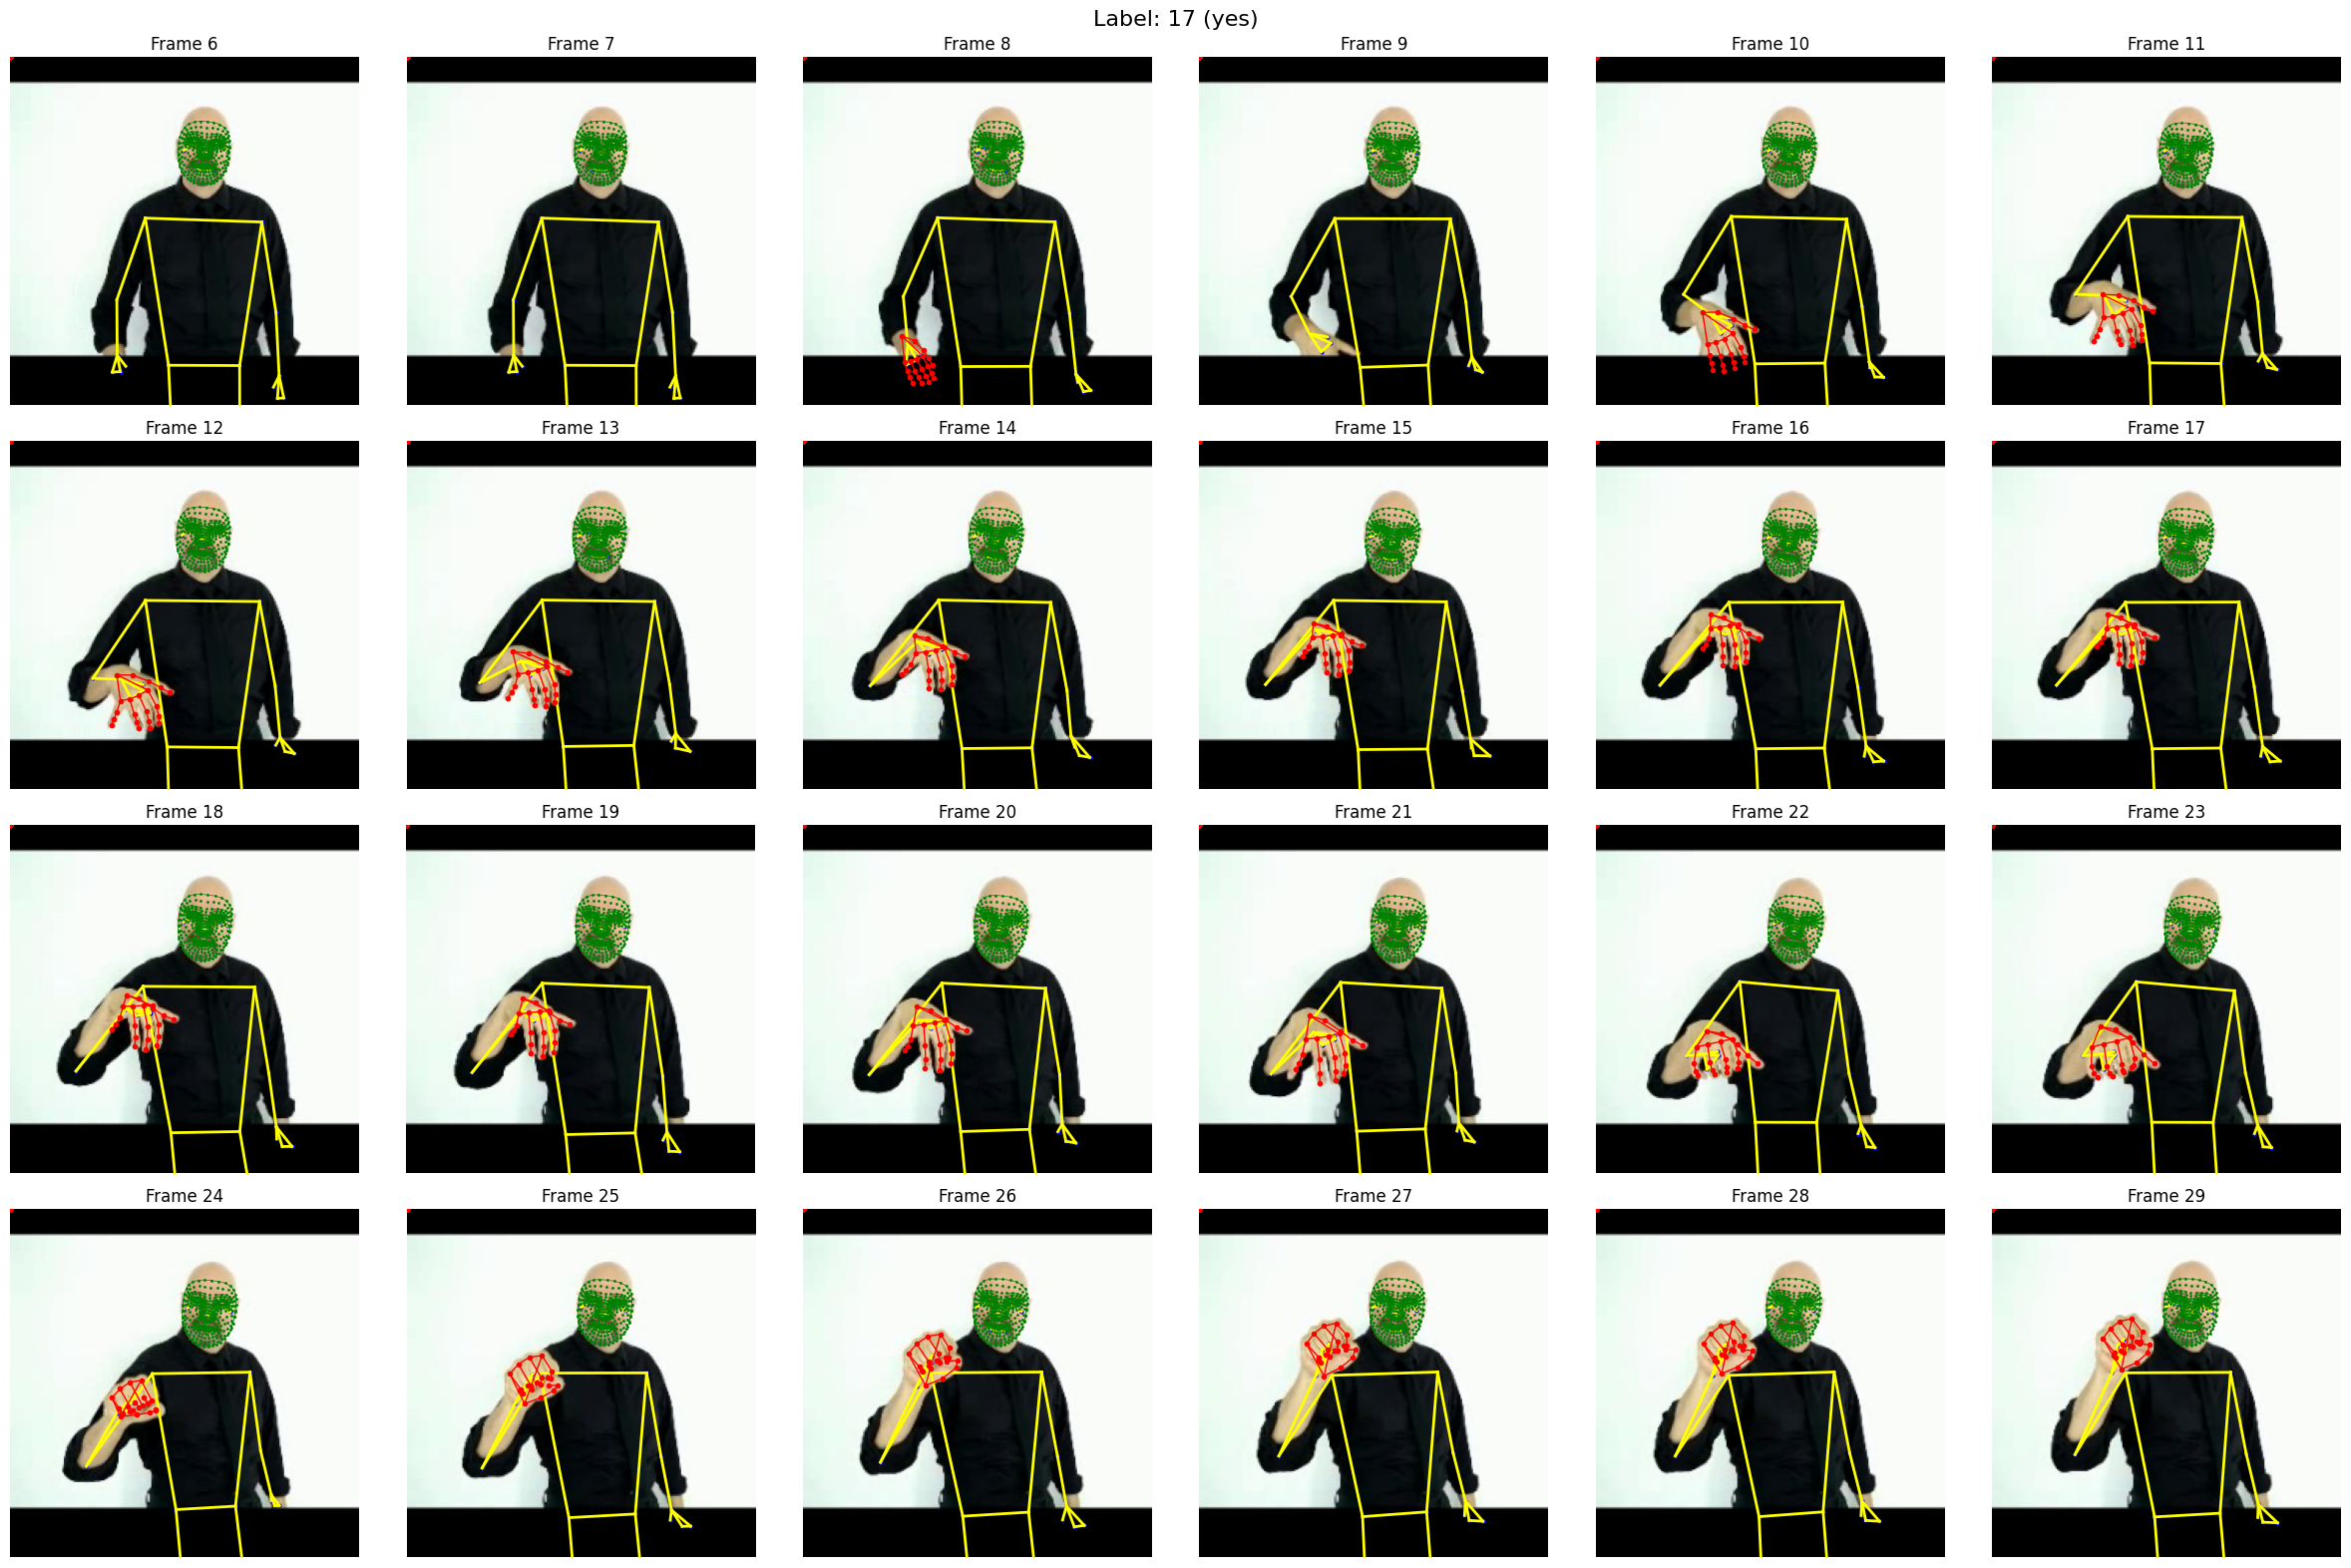

In [ ]:
from mediapipe.python.solutions.pose import POSE_CONNECTIONS
from mediapipe.python.solutions.hands import HAND_CONNECTIONS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS

sample = dataset[35]
frames = sample['video'].permute(1, 2, 3, 0).numpy()
landmarks = sample['landmarks'].numpy()
label = sample['label']
sample = ['video_path']

rows, cols = 4, 6
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
axes = axes.flatten()

for i in range(rows*cols):
  if i < len(frames):
    img = frames[i+5].astype(np.uint8)
    lmks = landmarks[i+5]
    h, w = img.shape[0], img.shape[1]

    axes[i].imshow(img)
    axes[i].set_xlim(0, w)
    axes[i].set_ylim(h, 0)
    axes[i].axis('off')
    axes[i].set_title(f"Frame {i+6}")

    # ------ POSE: 33 KEYPOINTS ------
    pose = lmks[0:33]
    axes[i].plot(pose[:, 0] * w, pose[:, 1] * h, 'bo', markersize=2)
    for a, b in POSE_CONNECTIONS:
        if a < 33 and b < 33:
            x1, y1 = pose[a, 0] * w, pose[a, 1] * h
            x2, y2 = pose[b, 0] * w, pose[b, 1] * h
            axes[i].plot([x1, x2], [y1, y2], 'yellow', linewidth=2)

    # ------ FACE: 468 KEYPOINTS ------
    face = lmks[33:501]
    axes[i].plot(face[:, 0] * w, face[:, 1] * h, 'go', markersize=1)
    for a, b in FACEMESH_CONTOURS:
        x1, y1 = face[a, 0] * w, face[a, 1] * h
        x2, y2 = face[b, 0] * w, face[b, 1] * h
        axes[i].plot([x1, x2], [y1, y2], color='green', linewidth=0.5)

    # ------ LEFT HAND: 21 KEYPOINTS ------
    l_hand = lmks[501:522]
    axes[i].plot(l_hand[:, 0] * w, l_hand[:, 1] * h, 'ro', markersize=3)
    for a, b in HAND_CONNECTIONS:
        x1, y1 = l_hand[a, 0] * w, l_hand[a, 1] * h
        x2, y2 = l_hand[b, 0] * w, l_hand[b, 1] * h
        axes[i].plot([x1, x2], [y1, y2], 'r', linewidth=1)

    # ------ RIGHT HAND: 21 KEYPOINTS ------
    r_hand = lmks[522:543]
    axes[i].plot(r_hand[:, 0] * w, r_hand[:, 1] * h, 'ro', markersize=3)
    for a, b in HAND_CONNECTIONS:
        x1, y1 = r_hand[a, 0] * w, r_hand[a, 1] * h
        x2, y2 = r_hand[b, 0] * w, r_hand[b, 1] * h
        axes[i].plot([x1, x2], [y1, y2], 'r', linewidth=1)
  else:
    axes[i].axis('off')

index_to_label = {v: k for k, v in class_idx.items()}
fig.suptitle(f"Label: {label.item()} ({index_to_label[label.item()]})", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig('64-frame-landmarks.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import cv2
import numpy as np
import os
from mediapipe.python.solutions.pose import POSE_CONNECTIONS
from mediapipe.python.solutions.hands import HAND_CONNECTIONS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS

def draw_landmarks_on_video(video_path, landmark_path, output_path, num_frames=64, img_size=224):
    # ---------- Load and resize video frames ----------
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (img_size, img_size))
        frames.append(frame)
    cap.release()

    if len(frames) == 0:
        print(f"[ERROR] No frames in video: {video_path}")
        return

    indices = np.linspace(0, len(frames)-1, num=num_frames).astype(int)
    frames = [frames[i] for i in indices]

    # ---------- Load and sample landmarks ----------
    landmarks = np.load(landmark_path)
    if landmarks.shape[0] != num_frames:
        lm_indices = np.linspace(0, landmarks.shape[0]-1, num=num_frames).astype(int)
        landmarks = landmarks[lm_indices]

    # ---------- Draw landmarks and write video ----------
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 10, (img_size, img_size))

    for i in range(num_frames):
        frame = frames[i]
        lmks = landmarks[i]
        h, w = frame.shape[:2]

        # POSE
        pose = lmks[0:33]
        for a, b in POSE_CONNECTIONS:
            pt1 = tuple((pose[a][:2] * [w, h]).astype(int))
            pt2 = tuple((pose[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (255, 0, 0), 1)
        for pt in pose:
            pt_xy = tuple((pt[:2] * [w, h]).astype(int))
            cv2.circle(frame, pt_xy, 2, (255, 0, 0), -1)

        # FACE
        face = lmks[33:501]
        for a, b in FACEMESH_CONTOURS:
            pt1 = tuple((face[a][:2] * [w, h]).astype(int))
            pt2 = tuple((face[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (0, 255, 0), 1)

        # LEFT HAND
        l_hand = lmks[501:522]
        for a, b in HAND_CONNECTIONS:
            pt1 = tuple((l_hand[a][:2] * [w, h]).astype(int))
            pt2 = tuple((l_hand[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (0, 0, 255), 1)
        for pt in l_hand:
            pt_xy = tuple((pt[:2] * [w, h]).astype(int))
            cv2.circle(frame, pt_xy, 3, (0, 0, 255), -1)

        # RIGHT HAND
        r_hand = lmks[522:543]
        for a, b in HAND_CONNECTIONS:
            pt1 = tuple((r_hand[a][:2] * [w, h]).astype(int))
            pt2 = tuple((r_hand[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (0, 0, 255), 1)
        for pt in r_hand:
            pt_xy = tuple((pt[:2] * [w, h]).astype(int))
            cv2.circle(frame, pt_xy, 3, (0, 0, 255), -1)

        out.write(frame)

    out.release()
    print(f"[DONE] Saved: {output_path}")

In [ ]:
output_path = '/content/00633-landmarks.mp4'
draw_landmarks_on_video('/content/videos/00633.mp4','/content/landmarks-64/00633.npy', output_path=output_path)

[DONE] Saved: /content/00633-landmarks.mp4


Saved: /content/output_drawn_video/70132_frame_0_drawn.png
Saved: /content/output_drawn_video/70132_frame_20_drawn.png
Saved: /content/output_drawn_video/70132_frame_42_drawn.png


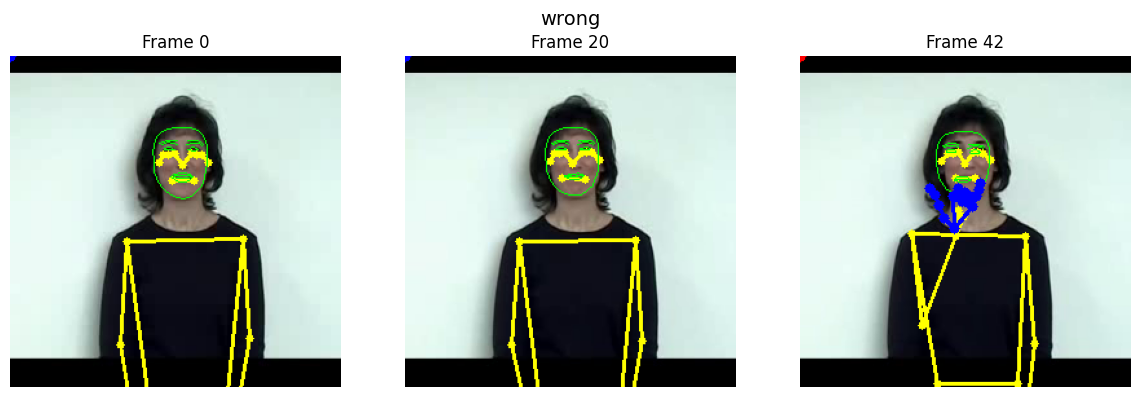

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS

def draw_landmarks_on_frame(video_id,
                             landmark_dir="/content/landmarks-64",
                             video_dir="/content/videos",
                             output_dir="/content/output_drawn_video",
                             frame_indices=[0, 12, 24]):

    os.makedirs(output_dir, exist_ok=True)

    # Load landmarks
    landmark_path = os.path.join(landmark_dir, f"{video_id}.npy")
    if not os.path.exists(landmark_path):
        print(f"Landmark file not found: {landmark_path}")
        return

    lmks_all = np.load(landmark_path)  # (T, 543, 3)

    # Load video
    video_path = os.path.join(video_dir, f"{video_id}.mp4")
    if not os.path.exists(video_path):
        print(f"Video file not found: {video_path}")
        return

    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    idx = 0
    frames_to_extract = set(frame_indices)

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if idx in frames_to_extract:
            frames.append((idx, frame.copy()))
        idx += 1
    cap.release()

    drawn_frames = {}

    for idx, frame in frames:
        if idx >= len(lmks_all):
            print(f"Frame {idx} is out of range of landmark file.")
            continue

        h, w = frame.shape[:2]
        lmks = lmks_all[idx]  # (543, 3)

        # POSE
        pose = lmks[0:33]
        for a, b in POSE_CONNECTIONS:
            pt1 = tuple((pose[a][:2] * [w, h]).astype(int))
            pt2 = tuple((pose[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (0, 255, 255), 2)
        for pt in pose:
            pt_xy = tuple((pt[:2] * [w, h]).astype(int))
            cv2.circle(frame, pt_xy, 3, (0, 255, 255), -1)

        # FACE
        face = lmks[33:501]
        for a, b in FACEMESH_CONTOURS:
            pt1 = tuple((face[a][:2] * [w, h]).astype(int))
            pt2 = tuple((face[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (0, 255, 0), 1)

        # LEFT HAND
        l_hand = lmks[501:522]
        for a, b in HAND_CONNECTIONS:
            pt1 = tuple((l_hand[a][:2] * [w, h]).astype(int))
            pt2 = tuple((l_hand[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (0, 0, 255), 2)
        for pt in l_hand:
            pt_xy = tuple((pt[:2] * [w, h]).astype(int))
            cv2.circle(frame, pt_xy, 4, (0, 0, 255), -1)

        # RIGHT HAND
        r_hand = lmks[522:543]
        for a, b in HAND_CONNECTIONS:
            pt1 = tuple((r_hand[a][:2] * [w, h]).astype(int))
            pt2 = tuple((r_hand[b][:2] * [w, h]).astype(int))
            cv2.line(frame, pt1, pt2, (255, 0, 0), 2)
        for pt in r_hand:
            pt_xy = tuple((pt[:2] * [w, h]).astype(int))
            cv2.circle(frame, pt_xy, 4, (255, 0, 0), -1)

        drawn_frames[idx] = frame
        save_path = os.path.join(output_dir, f"{video_id}_frame_{idx}_drawn.png")
        cv2.imwrite(save_path, frame)
        print(f"Saved: {save_path}")

    # Display with matplotlib
    plt.figure(figsize=(12, 4))
    for i, idx in enumerate(frame_indices):
        if idx in drawn_frames:
            plt.subplot(1, len(frame_indices), i + 1)
            plt.imshow(cv2.cvtColor(drawn_frames[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"Frame {idx}")
            plt.axis("off")
    index_to_label = {v: k for k, v in class_idx.items()}
    class_ids = sorted(class_idx.values())

    plt.suptitle(f"wrong", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"{video_id}_drawn.png", dpi=300)
    plt.show()
draw_landmarks_on_frame("70132", frame_indices=[0, 20, 42])

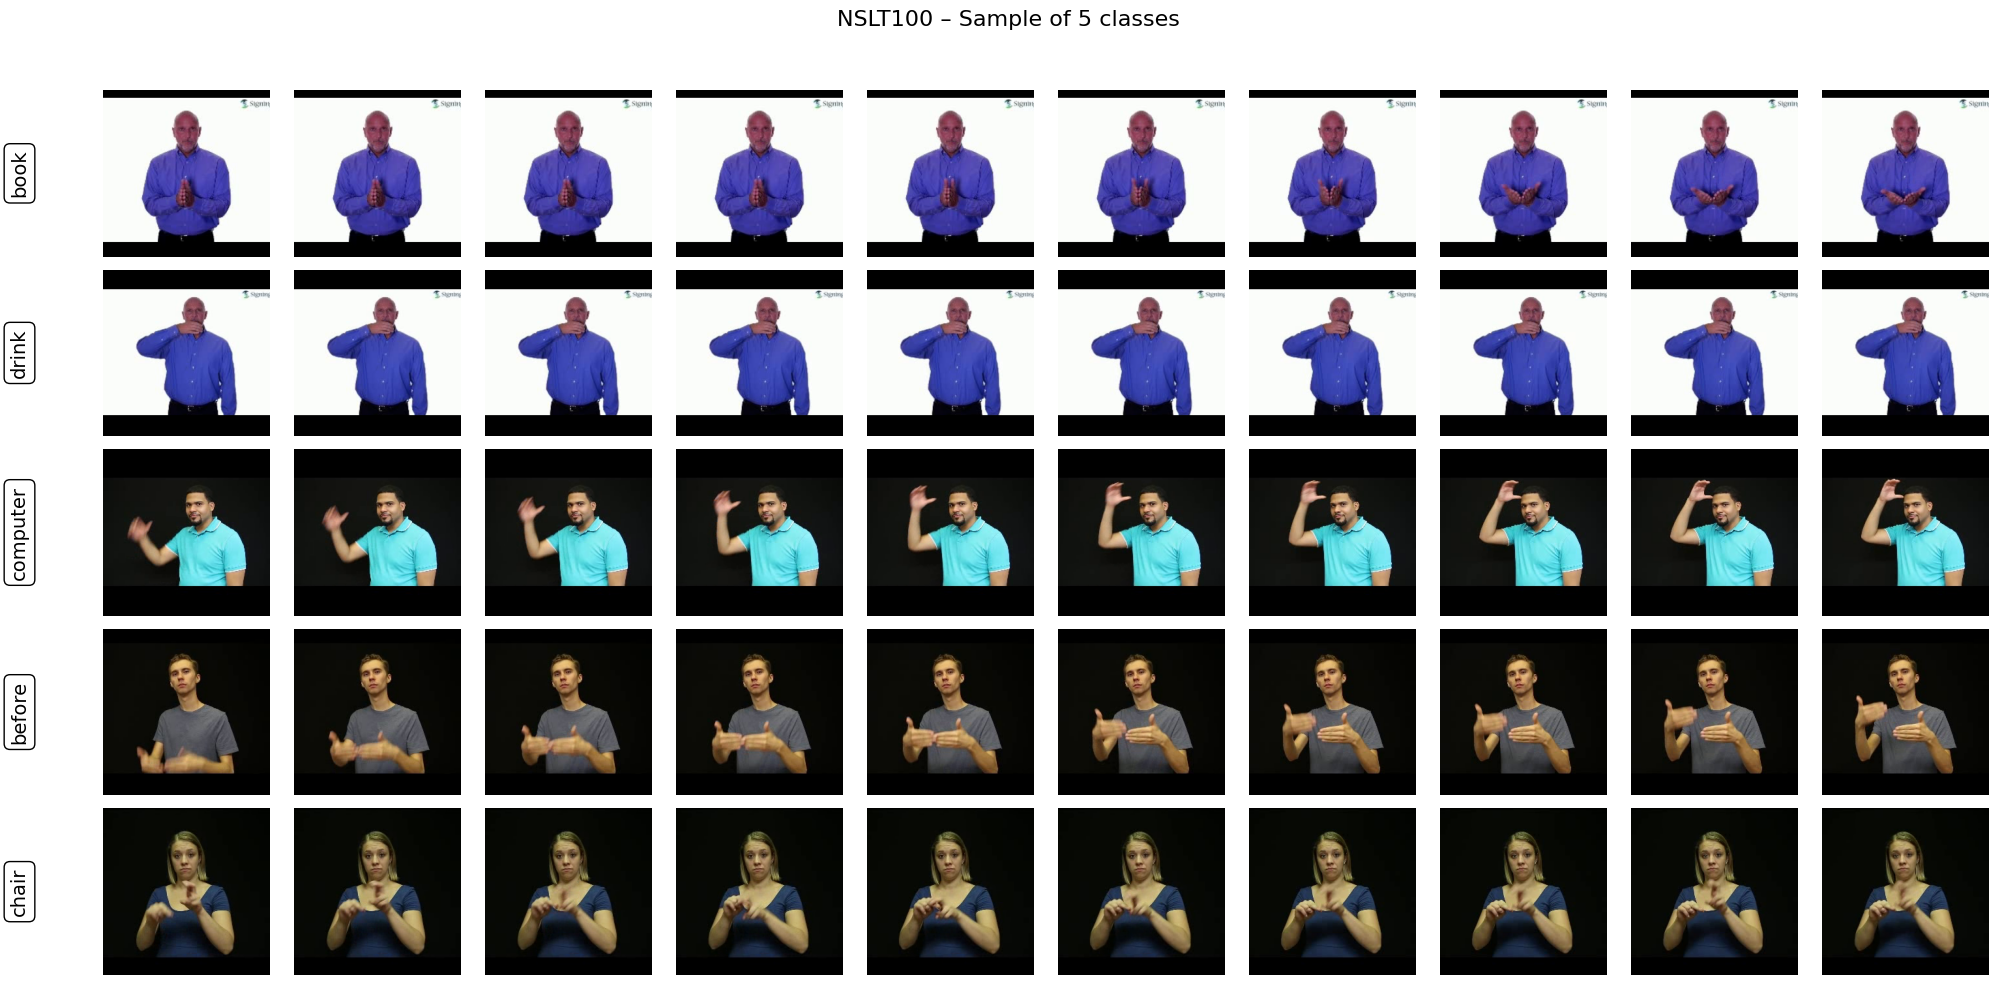

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

json_path = "/content/drive/MyDrive/Dataset/nslt_100.json"
video_root = "/content/videos"

index_to_label = {v: k for k, v in class_idx.items()}
class_ids = sorted(class_idx.values())

with open(json_path, "r") as f:
    data = json.load(f)

sample_videos = {}
for vid, meta in data.items():
    if meta["subset"] != "train":
        continue
    class_id = meta["action"][0]
    if class_id not in class_ids or class_id in sample_videos:
        continue

    video_path = os.path.join(video_root, f"{vid}.mp4")
    if not os.path.exists(video_path):
        continue

    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    cap.release()

    if total_frames < 50:
        sample_videos[class_id] = vid

    if len(sample_videos) == len(class_ids):
        break

rows, cols = 5, 10
fig, axs = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
fig.suptitle("NSLT100 – Sample of 5 classes", fontsize=16)

for row_idx, class_id in enumerate(class_ids[:rows]):  
    label_name = index_to_label[class_id]
    video_id = sample_videos[class_id]
    video_path = os.path.join(video_root, f"{video_id}.mp4")

    if not os.path.exists(video_path):
        print(f"Video not found: {video_path}")
        continue

    cap = cv2.VideoCapture(video_path)

    frames = []
    success = True
    count = 0
    while success and count <= 15:
        success, frame = cap.read()
        if success:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)
        count += 1
    cap.release()

    for col_idx in range(cols):
        ax = axs[row_idx, col_idx]
        if 6 + col_idx < len(frames):
            ax.imshow(frames[6 + col_idx])
        else:
            ax.imshow(np.zeros((224, 224, 3), dtype=np.uint8))  
        ax.axis("off")

    axs[row_idx, 0].text(
        -0.5, 0.5, label_name,
        fontsize=14, ha='center', va='center', rotation=90, transform=axs[row_idx, 0].transAxes,
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    )

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.savefig("/content/nslt100_grid.png", dpi=300)
plt.show()


Selected video ID: 24660
Class ID: 64, Label: give
Saved frame 0 to /content/output_frames/24660_frame_0.png
Saved frame 12 to /content/output_frames/24660_frame_12.png
Saved frame 24 to /content/output_frames/24660_frame_24.png


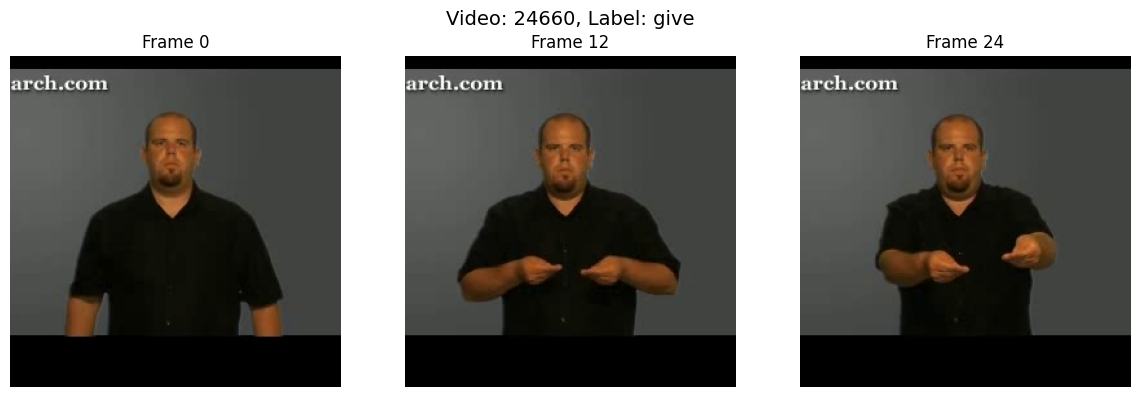

In [ ]:
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random

json_path = "/content/drive/MyDrive/Dataset/nslt_100.json"
video_root = "/content/videos"
output_dir = "/content/output_frames"
os.makedirs(output_dir, exist_ok=True)


index_to_label = {v: k for k, v in class_idx.items()}
class_ids = sorted(class_idx.values())

with open(json_path, "r") as f:
    data = json.load(f)

train_videos = []
for vid, meta in data.items():
    if meta["subset"] == "train":
        class_id = meta["action"][0]
        if class_id in class_ids:
            video_path = os.path.join(video_root, f"{vid}.mp4")
            if os.path.exists(video_path):
                train_videos.append((vid, class_id))

video_id, class_id = random.choice(train_videos)
label_name = index_to_label[class_id]
video_path = os.path.join(video_root, f"{video_id}.mp4")

print(f"Selected video ID: {video_id}")
print(f"Class ID: {class_id}, Label: {label_name}")


frame_indices = [0, 12, 24]
frames = {}

cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

for idx in frame_indices:
    if idx >= frame_count:
        print(f"Frame index {idx} is out of range for video with {frame_count} frames.")
        frames[idx] = np.zeros((224, 224, 3), dtype=np.uint8)
        continue

    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ret, frame = cap.read()
    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames[idx] = frame_rgb
    else:
        print(f"Failed to read frame {idx}")
        frames[idx] = np.zeros((224, 224, 3), dtype=np.uint8)

cap.release()

for idx, img in frames.items():
    save_path = os.path.join(output_dir, f"{video_id}_frame_{idx}.png")
    cv2.imwrite(save_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    print(f"Saved frame {idx} to {save_path}")

plt.figure(figsize=(12, 4))
for i, idx in enumerate(frame_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(frames[idx])
    plt.title(f"Frame {idx}")
    plt.axis("off")

plt.suptitle(f"Video: {video_id}, Label: {label_name}", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 23.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-

Saved: /content/output_landmark_drawn/24660_frame_0_drawn.png
Saved: /content/output_landmark_drawn/24660_frame_12_drawn.png
Saved: /content/output_landmark_drawn/24660_frame_24_drawn.png


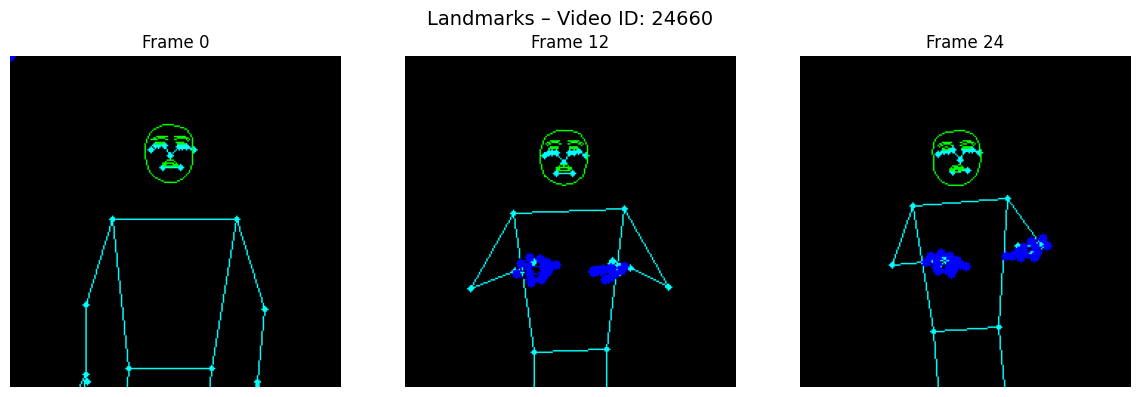

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

from mediapipe.python.solutions.pose_connections import POSE_CONNECTIONS
from mediapipe.python.solutions.hands_connections import HAND_CONNECTIONS
from mediapipe.python.solutions.face_mesh_connections import FACEMESH_CONTOURS

# ------------------------
# Settings
# ------------------------
video_id = "24660"
landmark_path = f"/content/landmarks-64/{video_id}.npy"
output_dir = "/content/output_landmark_drawn"
os.makedirs(output_dir, exist_ok=True)

# Frame size
w, h = 224, 224
frame_indices = [0, 12, 24]

# ------------------------
# Load landmark file
# ------------------------
lmks_all = np.load(landmark_path)  # (T, 543, 3)

output_frames = {}

for idx in frame_indices:
    frame = np.zeros((h, w, 3), dtype=np.uint8)

    if idx >= len(lmks_all):
        print(f"Frame {idx} is out of range.")
        output_frames[idx] = frame
        continue

    lmks = lmks_all[idx]  # shape: (543, 3)

    # --- POSE ---
    pose = lmks[0:33]
    for a, b in POSE_CONNECTIONS:
        pt1 = tuple((pose[a][:2] * [w, h]).astype(int))
        pt2 = tuple((pose[b][:2] * [w, h]).astype(int))
        cv2.line(frame, pt1, pt2, (0, 255, 255), 1)  # Yellow

    for pt in pose:
        pt_xy = tuple((pt[:2] * [w, h]).astype(int))
        cv2.circle(frame, pt_xy, 2, (0, 255, 255), -1)  # Yellow

    # --- FACE ---
    face = lmks[33:501]
    for a, b in FACEMESH_CONTOURS:
        pt1 = tuple((face[a][:2] * [w, h]).astype(int))
        pt2 = tuple((face[b][:2] * [w, h]).astype(int))
        cv2.line(frame, pt1, pt2, (0, 255, 0), 1)

    # --- LEFT HAND ---
    l_hand = lmks[501:522]
    for a, b in HAND_CONNECTIONS:
        pt1 = tuple((l_hand[a][:2] * [w, h]).astype(int))
        pt2 = tuple((l_hand[b][:2] * [w, h]).astype(int))
        cv2.line(frame, pt1, pt2, (0, 0, 255), 1)
    for pt in l_hand:
        pt_xy = tuple((pt[:2] * [w, h]).astype(int))
        cv2.circle(frame, pt_xy, 3, (0, 0, 255), -1)

    # --- RIGHT HAND ---
    r_hand = lmks[522:543]
    for a, b in HAND_CONNECTIONS:
        pt1 = tuple((r_hand[a][:2] * [w, h]).astype(int))
        pt2 = tuple((r_hand[b][:2] * [w, h]).astype(int))
        cv2.line(frame, pt1, pt2, (0, 0, 255), 1)
    for pt in r_hand:
        pt_xy = tuple((pt[:2] * [w, h]).astype(int))
        cv2.circle(frame, pt_xy, 3, (0, 0, 255), -1)

    output_frames[idx] = frame
    save_path = os.path.join(output_dir, f"{video_id}_frame_{idx}_drawn.png")
    cv2.imwrite(save_path, frame)
    print(f"Saved: {save_path}")

# ------------------------
# Display
# ------------------------
plt.figure(figsize=(12, 4))
for i, idx in enumerate(frame_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(output_frames[idx])
    plt.title(f"Frame {idx}")
    plt.axis("off")

plt.suptitle(f"Landmarks – Video ID: {video_id}", fontsize=14)
plt.tight_layout()
plt.show()
